# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score


In [116]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [50]:
df.shape

(50000, 14)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

# Check Anomali Data

## Duplicated

In [117]:
# Duplicated

duplicated = df[df.duplicated()]
sort_duplicated = duplicated.sort_index()

print(sort_duplicated)

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
196                 5      Internet  RoundTrip            206              17   
316                 5      Internet  RoundTrip            206              17   
384                 5      Internet  RoundTrip            206              17   
456                 1      Internet  RoundTrip             30              85   
513                 3      Internet  RoundTrip            109              20   
...               ...           ...        ...            ...             ...   
49852               2      Internet  RoundTrip            204               6   
49902               1        Mobile  RoundTrip            106               6   
49934               1      Internet  RoundTrip              2               6   
49944               1      Internet  RoundTrip              2               6   
49961               1      Internet  RoundTrip             30               6   

       flight_hour flight_d

In [118]:
df = df.drop_duplicates()

print("Deleted duplicated data")

Deleted duplicated data


# Null Data

In [54]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

All data is complete

## Mapping Data

In [72]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [119]:
df['flight_day'] = df['flight_day'].map({
                                        "Mon": 1,
                                        "Tue": 2,
                                        "Wed": 3,
                                        "Thu": 4,
                                        "Fri": 5,
                                        "Sat": 6,
                                        "Sun": 7,
                                    })
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

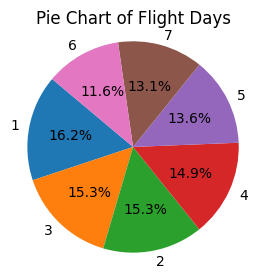

In [120]:
# CCounting how persentages 
value_counts = df['flight_day'].value_counts()

# Plot pie chart
plt.figure(figsize=(3,3))  # Atur ukuran pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)  # '%1.1f%%' untuk menampilkan persentase
plt.axis('equal')  # Membuat pie chart menjadi lingkaran

# Atur judul
plt.title('Pie Chart of Flight Days')

# Tampilkan pie chart
plt.show()

It can be seen that the most flights are on Mondays = 16.2%

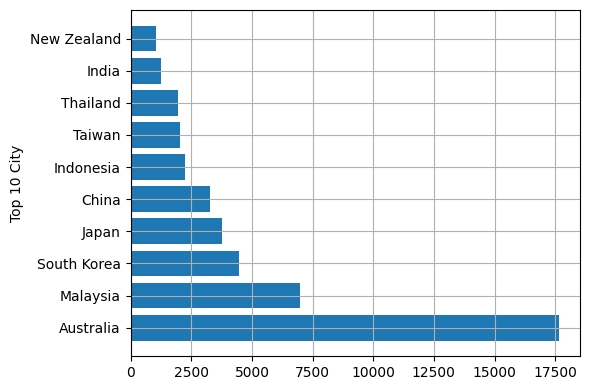

In [96]:
city = df['booking_origin'].value_counts().head(10)


labels = city.index
counts = city.values

plt.figure(figsize=(6, 4))
plt.barh(labels, counts)
plt.ylabel("Top 10 City")

plt.grid()
plt.tight_layout()
plt.show()
#print(top_10_city)

<Axes: xlabel='sales_channel'>

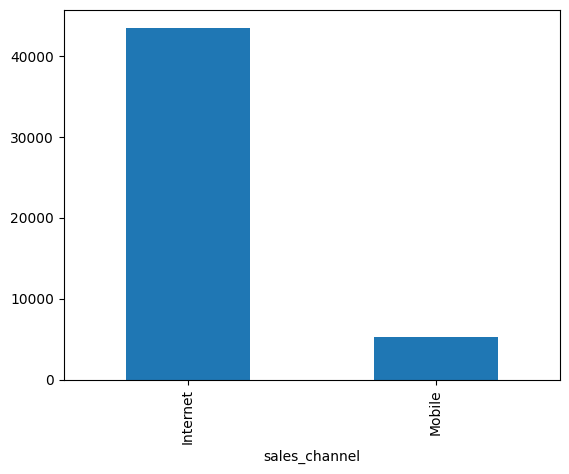

In [95]:
df.sales_channel.value_counts().plot(kind='bar')

In [58]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

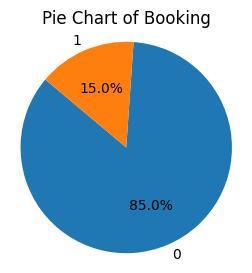

In [76]:
# Menghitung jumlah setiap nilai dalam kolom 'booking_complete'
label_booking = df['booking_complete'].value_counts()

# Plot pie chart
plt.figure(figsize=(3, 3))  # Atur ukuran pie chart
plt.pie(label_booking, labels=label_booking.index, autopct='%1.1f%%', startangle=140) # '%1.1f%%' untuk menampilkan persentase
plt.axis('equal')  # Membuat pie chart menjadi lingkaran

# Atur judul
plt.title('Pie Chart of Booking')

# Tampilkan pie chart
plt.show()

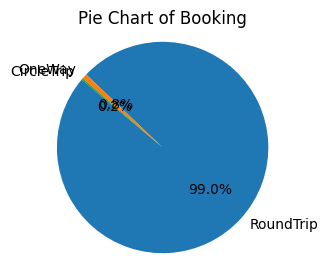

In [77]:
labels_trip = df['trip_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(3, 3))  # Atur ukuran pie chart
plt.pie(labels_trip, labels=labels_trip.index, autopct='%1.1f%%', startangle=140) # '%1.1f%%' untuk menampilkan persentase
plt.axis('equal')  # Membuat pie chart menjadi lingkaran

# Atur judul
plt.title('Pie Chart of Booking')

# Tampilkan pie chart
plt.show()

In [121]:
counts_booking = df.booking_complete.value_counts()

count_0 = counts_booking.get(0, 0)  # Mengambil jumlah 0 (jika tidak ada, default ke 0)
count_1 = counts_booking.get(1, 0)  # Mengambil jumlah 1 (jika tidak ada, default ke 0)

# Menghitung persentase
percentage_0 = (count_0 / len(df)) * 100
percentage_1 = (count_1 / len(df)) * 100

print(f'Percentage of 0 in "booking" column: {percentage_0:.2f}%')
print(f'Percentage of 1 in "booking" column: {percentage_1:.2f}%')


Percentage of 0 in "booking" column: 85.00%
Percentage of 1 in "booking" column: 15.00%


## Distribution Columns

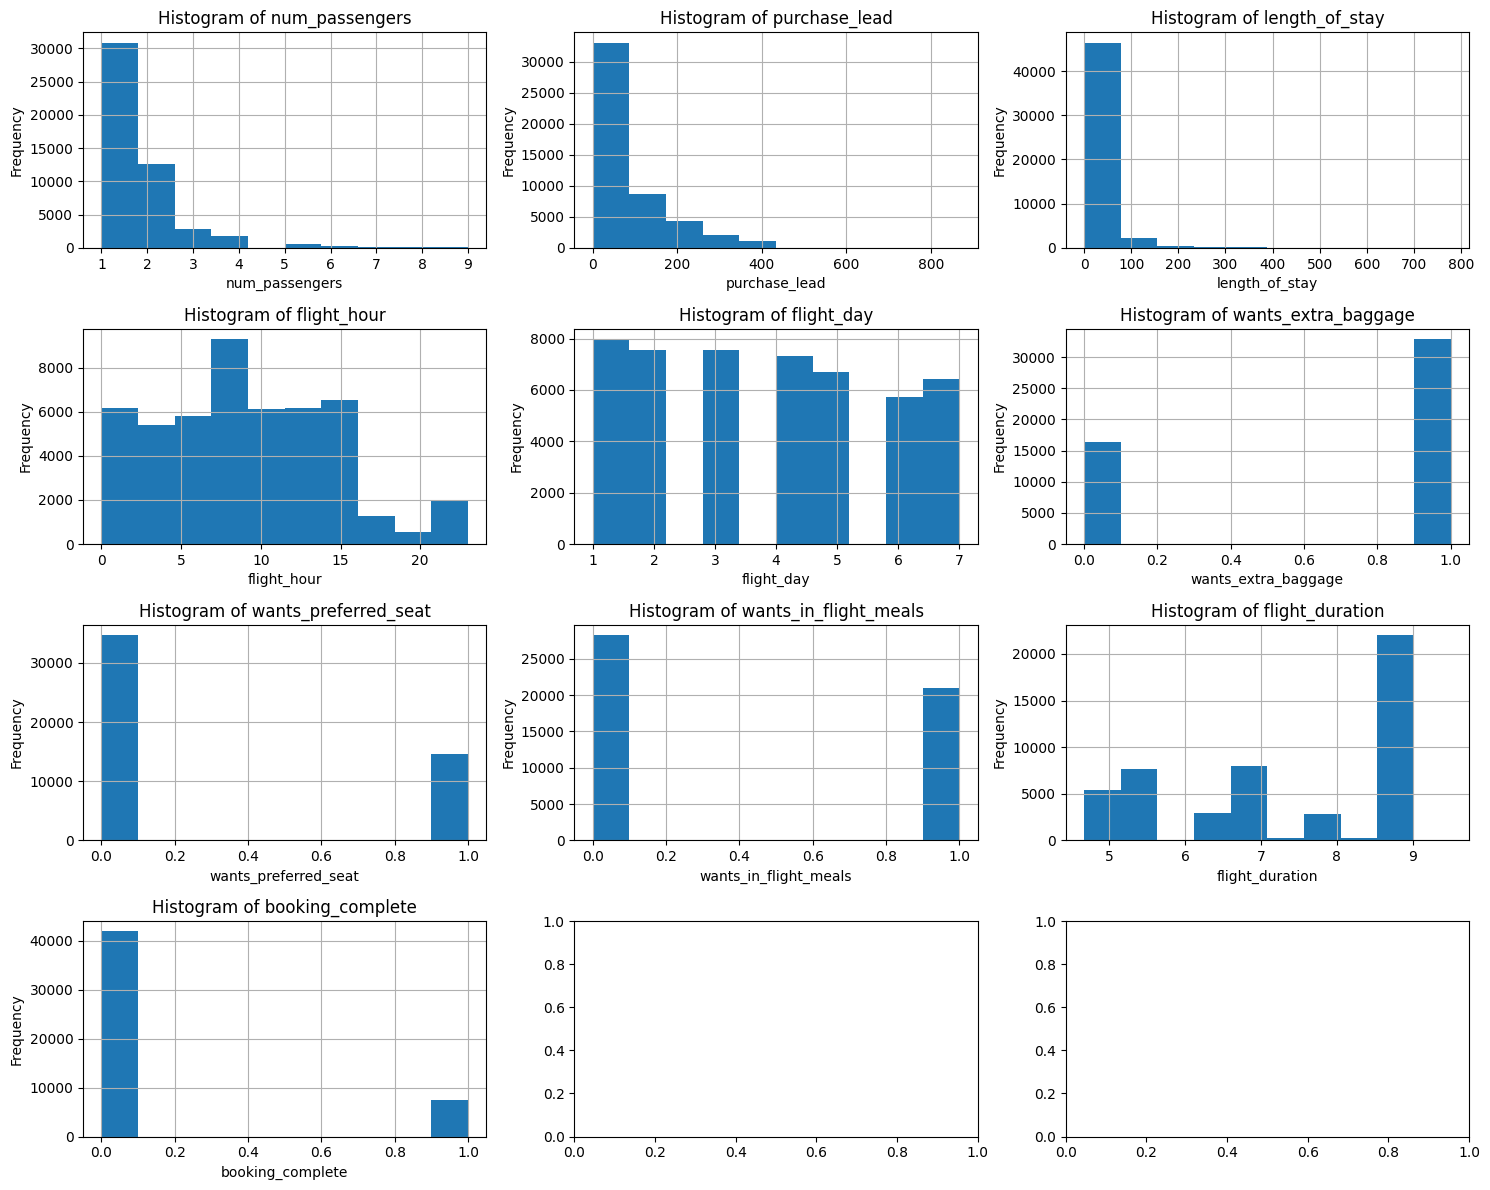

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

numeric_cols = df.select_dtypes(include='number')
for i, column in enumerate(numeric_cols.columns):
    row = i // 3  # Hitung indeks baris
    col = i % 3   # Hitung indeks kolom
    numeric_cols[column].hist(ax=axes[row, col], bins=10)
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [79]:
# Tampilkan distribusi unik untuk kolom kategorikal
categorical_cols = df.select_dtypes(exclude='number')
for column in categorical_cols.columns:
    print(f"Distribusi untuk kolom '{column}':")
    print(df[column].value_counts())
    print()

Distribusi untuk kolom 'sales_channel':
sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

Distribusi untuk kolom 'trip_type':
trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

Distribusi untuk kolom 'route':
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

Distribusi untuk kolom 'booking_origin':
booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64



investigasation for 'purchase_lead' and 'lenght_of_stay' columns.
we will make a filter for more 1 year or 400 days. 

# Feature Engineering

In [122]:
max_r = df['flight_hour'].max()
min_r = df['flight_hour'].min()

total_bins = 3 #Brief, Moderate, Extended 
# Hitung lebar setiap bins berdasarkan rentang nilai max dan min
weight_bins = (max_r - min_r) / total_bins

range_bins = [min_r + i * weight_bins for i in range(total_bins+1)]
print(range_bins)

[0.0, 7.666666666666667, 15.333333333333334, 23.0]


In [123]:
df['flight_hour_range'] = pd.cut(
    x=df['flight_day'],
    bins=[0.0, 7.666666666666667, 15.333333333333334, 23.0],
    labels=["Brief", "Moderate", "Extended "]
)

<Axes: xlabel='flight_hour_range'>

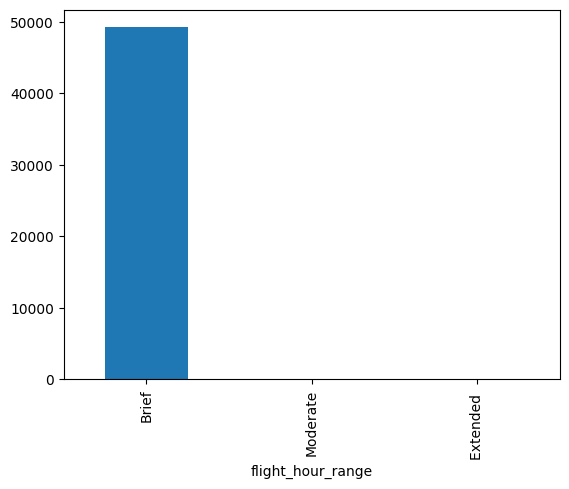

In [124]:
df['flight_hour_range'].value_counts().plot(kind='bar')

In [125]:
purchase_ = (df.purchase_lead>400).value_counts()
print('Data more 600 is', purchase_)

Data more 600 is purchase_lead
False    48901
True       380
Name: count, dtype: int64


There are 386 data's. Let's delete it

In [126]:
# filter
df.drop(df[df['purchase_lead'] > 400].index, inplace=True)

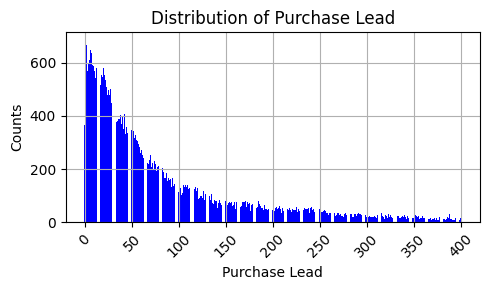

In [127]:
# Menghitung jumlah masing-masing kategori 'purchase_lead' dan labelnya
purchase_days = df['purchase_lead'].value_counts()
labels = purchase_days.index

# Membuat bar chart
plt.figure(figsize=(5, 3))

plt.bar(labels, purchase_days, color='blue')
plt.xlabel("Purchase Lead")
plt.ylabel('Counts')

plt.title("Distribution of Purchase Lead")

plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca jika ada banyak kategori

plt.grid()
plt.tight_layout()
plt.show()


In [128]:
# investigation Lenght of stay colum

lenght_of_stay_invest = (df.length_of_stay> 400).value_counts()
print(lenght_of_stay_invest)

length_of_stay
False    48884
True        17
Name: count, dtype: int64


There are 17 data's. Let's delete it

In [129]:
df.drop(df[df['length_of_stay']>400].index, inplace=True)

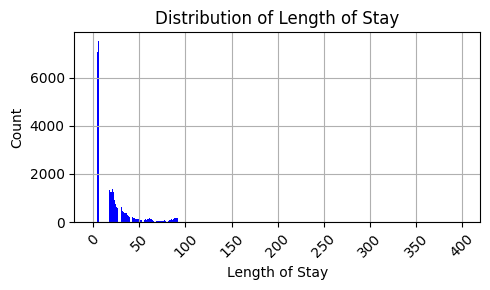

In [130]:
value_counts = df['length_of_stay'].value_counts()
categories = value_counts.index
counts = value_counts.values

# Membuat bar chart
plt.figure(figsize=(5,3))

plt.bar(categories, counts, color='blue')
plt.xlabel("Length of Stay")
plt.ylabel("Count")

plt.title("Distribution of Length of Stay")
plt.xticks(rotation=45)  # Memutar label sumbu x untuk membaca lebih baik

plt.grid()
plt.tight_layout()  # Memastikan label dan plot tidak tumpang tindih
plt.show()


In [131]:
df.to_csv('data/(Cleanup)customer_booking.csv')

In [134]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'flight_hour_range'],
      dtype='object')

In [158]:
df_finish = df[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'flight_hour_range']]

df_finish.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_hour_range
0,2,Internet,RoundTrip,262,19,6,1,0,0,5.52,0,Brief
1,1,Internet,RoundTrip,112,20,6,0,0,0,5.52,0,Brief
2,2,Internet,RoundTrip,243,22,3,1,1,0,5.52,0,Brief
3,1,Internet,RoundTrip,96,31,6,0,0,1,5.52,0,Brief
4,2,Internet,RoundTrip,68,22,3,1,0,1,5.52,0,Brief


##Scaling

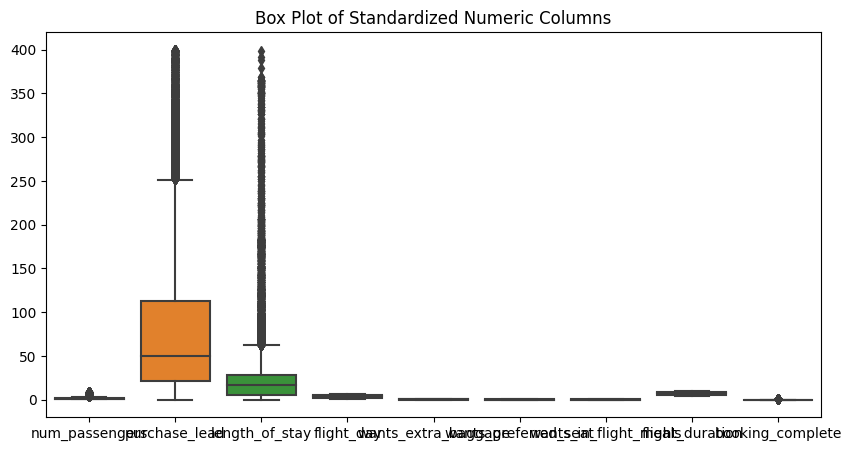

In [159]:
# Menampilkan box plot dari DataFrame yang telah di-standarisasi
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_finish)
plt.title('Box Plot of Standardized Numeric Columns')
plt.show()

In [160]:
# Mengambil semua kolom dengan tipe data numerik
numeric_columns = df_finish.select_dtypes(include='number')

# Menghilangkan kolom non-numerik dari DataFrame
df_numeric = df_finish[numeric_columns.columns]

# Standarisasi data numerik menggunakan StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_numeric)
df_std = pd.DataFrame(data=df_std, index=df_finish.index, columns=numeric_columns.columns)

print(df_std)

       num_passengers  purchase_lead  length_of_stay  flight_day  \
0            0.408506       2.104903       -0.122474    1.100259   
1           -0.577881       0.350075       -0.091690    1.100259   
2            0.408506       1.882625       -0.030122   -0.408791   
3           -0.577881       0.162894        0.246936    1.100259   
4            0.408506      -0.164674       -0.030122   -0.408791   
...               ...            ...             ...         ...   
49995        0.408506      -0.644327       -0.522668    1.100259   
49996       -0.577881       0.338377       -0.522668    1.603276   
49997       -0.577881      -0.679423       -0.522668    1.100259   
49998       -0.577881      -0.784713       -0.522668   -1.414824   
49999       -0.577881      -0.737918       -0.522668    0.094226   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.702501             -0.649167              -0.864389   
1                -1.423485       

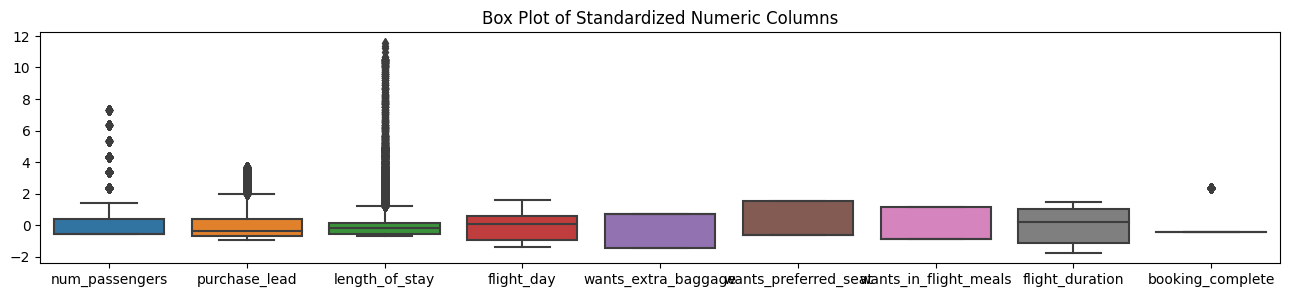

In [161]:
# Menampilkan box plot dari DataFrame yang telah di-standarisasi
plt.figure(figsize=(16, 3))
sns.boxplot(data=df_std)
plt.title('Box Plot of Standardized Numeric Columns')
plt.show()

In [162]:
categorical_columns = df_finish.select_dtypes(include='category').columns.tolist()

print(categorical_columns)

# Convert categorical_columns to the underlying data type (object) before slicing
df_encode = df[categorical_columns].copy()

for col in categorical_columns:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

['flight_hour_range']


In [163]:
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')
print(df_model.head())

   flight_hour_range  num_passengers  purchase_lead  length_of_stay  \
0                  0        0.408506       2.104903       -0.122474   
1                  0       -0.577881       0.350075       -0.091690   
2                  0        0.408506       1.882625       -0.030122   
3                  0       -0.577881       0.162894        0.246936   
4                  0        0.408506      -0.164674       -0.030122   

   flight_day  wants_extra_baggage  wants_preferred_seat  \
0    1.100259             0.702501             -0.649167   
1    1.100259            -1.423485             -0.649167   
2   -0.408791             0.702501              1.540435   
3    1.100259            -1.423485             -0.649167   
4   -0.408791             0.702501             -0.649167   

   wants_in_flight_meals  flight_duration  booking_complete  
0              -0.864389        -1.174827         -0.420333  
1              -0.864389        -1.174827         -0.420333  
2              -0.864389  

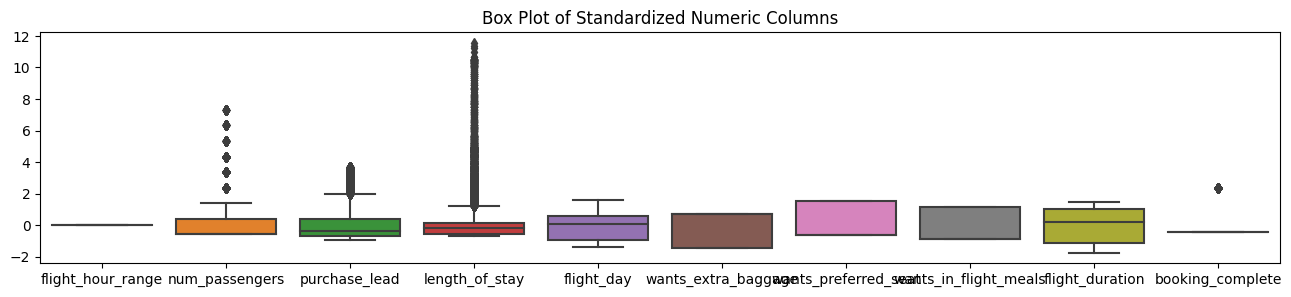

In [164]:
# Menampilkan box plot dari DataFrame yang telah di-standarisasi
plt.figure(figsize=(16, 3))
sns.boxplot(data=df_model)
plt.title('Box Plot of Standardized Numeric Columns')
plt.show()

# Modeling

In [165]:
df_model.columns

Index(['flight_hour_range', 'num_passengers', 'purchase_lead',
       'length_of_stay', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete'],
      dtype='object')

In [188]:
# Memilih kolom-kolom yang akan digunakan sebagai fitur dalam X
X = df_model[['flight_hour_range', 'num_passengers', 'purchase_lead', 'length_of_stay', 
             'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 
             'wants_in_flight_meals', 'flight_duration']]

# Menetapkan kolom 'booking_complete' sebagai label y
y = df_model['booking_complete']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [194]:
# Inisialisasi model regresi linear
regression_model = LinearRegression()

# Melatih model pada data pelatihan
regression_model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_regression = regression_model.predict(X_test)

# Menghitung metrik evaluasi (MSE dan R2 Score)
mse_regression = mean_squared_error(y_test, y_pred_regression)
r2_regression = r2_score(y_test, y_pred_regression)

# Menampilkan hasil evaluasi
print("Regresi Linear:")
print("MSE:", mse_regression)
print("R2 Score:", r2_regression)

Regresi Linear:
MSE: 0.9790231581651753
R2 Score: 0.024785063094857285


In [196]:
threshold = 0.5
y_classification = (y > threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier()

# Melatih model pada data pelatihan
rf_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_rf = rf_classifier.predict(X_test)

# Menghitung akurasi dan laporan klasifikasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest (Klasifikasi):")
print("Akurasi:", accuracy_rf)
print("Laporan Klasifikasi:\n", classification_report_rf)

Random Forest (Klasifikasi):
Akurasi: 0.8323616651324537
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      8302
           1       0.29      0.08      0.12      1475

    accuracy                           0.83      9777
   macro avg       0.57      0.52      0.51      9777
weighted avg       0.77      0.83      0.79      9777



# Evaluation Model

## Regression Model

In [199]:
# Melakukan prediksi pada data pengujian
y_pred_regression = regression_model.predict(X_test)

# Menghitung metrik evaluasi (MSE dan R2 Score)
mse_regression_pred = mean_squared_error(y_test, y_pred_regression)
r2_regression_pred = r2_score(y_test, y_pred_regression)

# Menampilkan hasil evaluasi
print("Regresi Linear:")
print("MSE:", mse_regression_pred)
print("R2 Score:", r2_regression_pred)

Regresi Linear:
MSE: 0.15575705881669266
R2 Score: -0.21586181333676668


## Random Forest (Klasifikasi)

In [200]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest (Klasifikasi):")
print("Akurasi:", accuracy_rf)
print("Laporan Klasifikasi:\n", classification_report_rf)

Random Forest (Klasifikasi):
Akurasi: 0.8323616651324537
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      8302
           1       0.29      0.08      0.12      1475

    accuracy                           0.83      9777
   macro avg       0.57      0.52      0.51      9777
weighted avg       0.77      0.83      0.79      9777



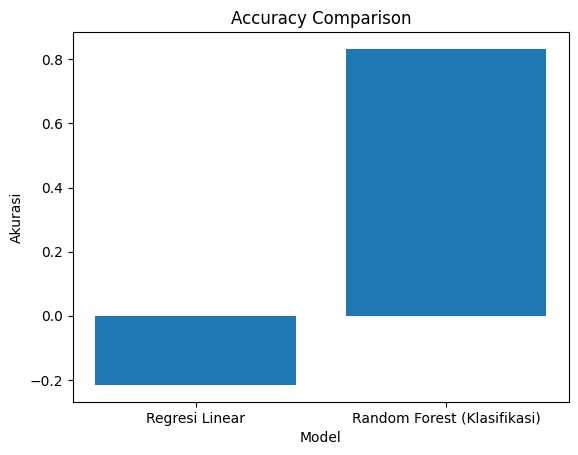

In [203]:
models = ['Regresi Linear', 'Random Forest (Klasifikasi)']
accuracy = [r2_regression_pred, accuracy_rf]

plt.bar(models, accuracy)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Accuracy Comparison')
plt.show()

In [205]:
from sklearn.ensemble import RandomForestRegressor  # Untuk regresi
# atau
# from sklearn.ensemble import RandomForestClassifier  # Untuk klasifikasi

# Inisialisasi model Random Forest
model = RandomForestRegressor()  # Ganti dengan RandomForestClassifier jika Anda melakukan klasifikasi

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Mendapatkan tingkat pentingnya setiap fitur
feature_importance = model.feature_importances_

# Menampilkan hasilnya
for i, importance in enumerate(feature_importance):
    print(f"Fitur {i + 1}: {importance}")

Fitur 1: 0.0
Fitur 2: 0.07692853294634659
Fitur 3: 0.4105067137875232
Fitur 4: 0.18275996239518796
Fitur 5: 0.14524104439903657
Fitur 6: 0.01658124814456507
Fitur 7: 0.02186464107921187
Fitur 8: 0.037765051962534504
Fitur 9: 0.10835280528559427


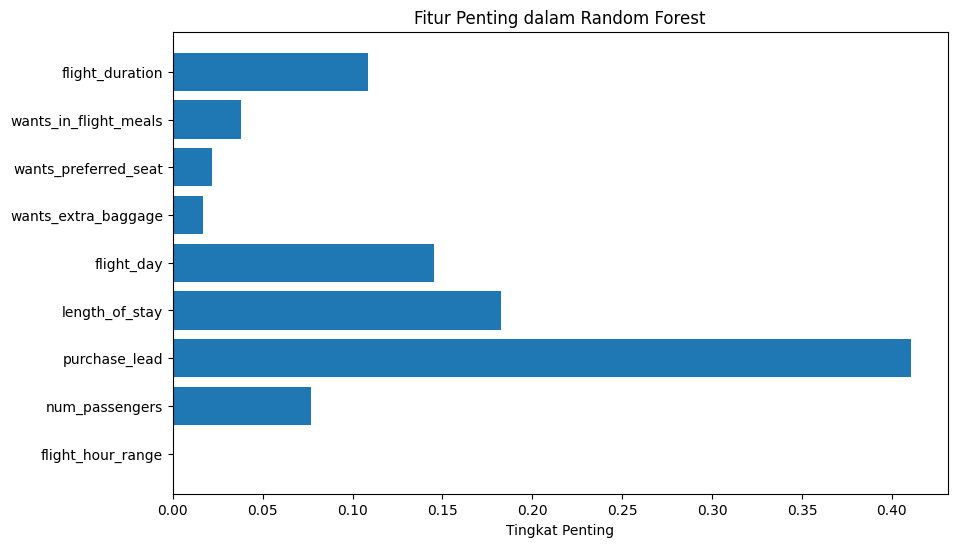

In [206]:
# Membuat daftar nama fitur
feature_names = X.columns  # Ganti dengan nama kolom fitur Anda

# Membuat grafik batang fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Tingkat Penting')
plt.title('Fitur Penting dalam Random Forest')
plt.show()
